In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
data= pd.read_csv("olimpiyatlar.csv")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [91]:
data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [92]:
data.shape

(271116, 15)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Pie Charts 

In [98]:
#öncelikli olarak pasta grafikleini çizdireceğimiz fonksiyonu yazalım.
def pie_visualization(dataframe,column):
    dataframe[column].value_counts().plot.pie(legend=True,autopct="%1.2f%%")

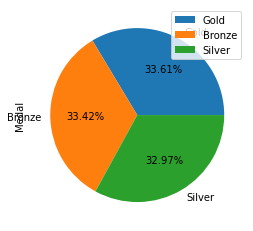

In [99]:
pie_visualization(data,"Medal")

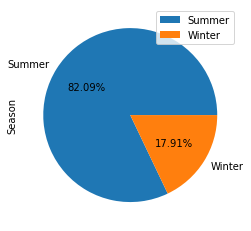

In [100]:
pie_visualization(data,"Season")

Bar Plot 

In [101]:
#öncelikle çubuk garfiğini çizdireceğimiz metodu yazalım
def plotBar(degisken, n=5):
    """
        Girdi: Değişken/sütun ismi
               n= Gösterilecek eşsiz değer sayısı
        Çıktı: Çubuk Grafiği
    """
    data_ =data[degisken]
    data_sayma = data_.value_counts()
    data_sayma = data_sayma[:n]
    plt.figure()
    plt.bar(data_sayma.index, data_sayma , color= "pink")
    plt.xticks(data_sayma.index, data_sayma.index.values)
    plt.xticks(rotation=40) #yazı eğikliği 
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, data_sayma))

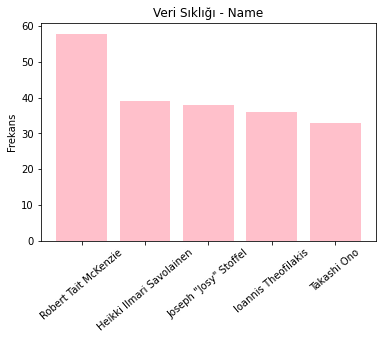

Name: 
 Robert Tait McKenzie        58
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33
Name: Name, dtype: int64


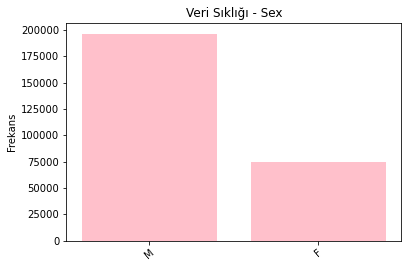

Sex: 
 M    196594
F     74522
Name: Sex, dtype: int64


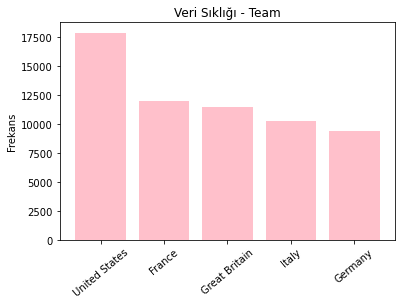

Team: 
 United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: Team, dtype: int64


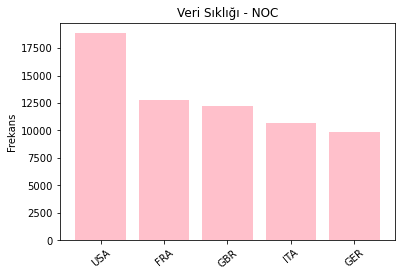

NOC: 
 USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: NOC, dtype: int64


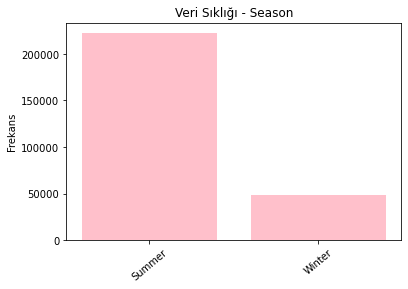

Season: 
 Summer    222552
Winter     48564
Name: Season, dtype: int64


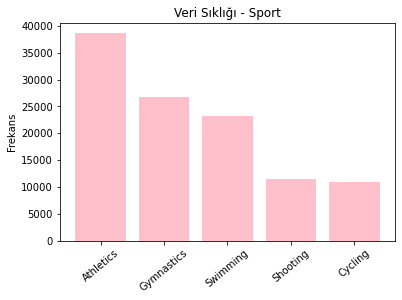

Sport: 
 Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64


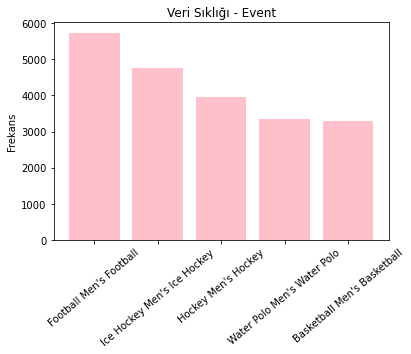

Event: 
 Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: Event, dtype: int64


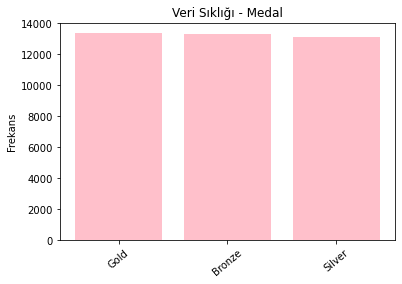

Medal: 
 Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


In [102]:
kategorik_degisken = ["Name", "Sex", "Team", "NOC", "Season", "Sport", "Event", "Medal" ]
for i in kategorik_degisken:
    plotBar(i)

Line Plot  Grafiği Çizdirme

<AxesSubplot:xlabel='Age', ylabel='Medal'>

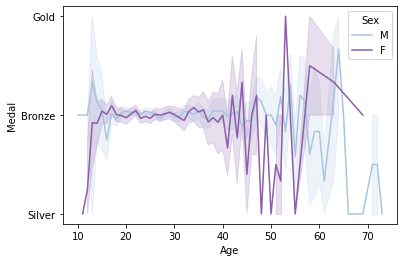

In [103]:
sns.lineplot(data=data, x="Age", y="Medal", hue="Sex", palette="BuPu")

<AxesSubplot:xlabel='Height', ylabel='Medal'>

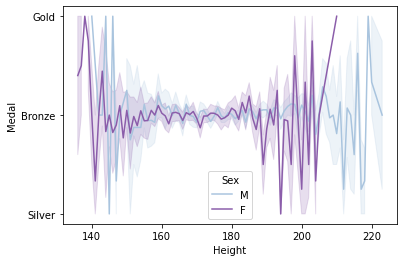

In [73]:
sns.lineplot(data=data, x="Height", y="Medal", hue="Sex", palette="BuPu")

Histogram

In [106]:
#öncelikli olarak histogram grafikleini çizdireceğimiz fonksiyonu yazalım.
def plotHistogram(degisken):
    """
        Girdi: Değisken / sütun ismi
        Çıktı: İlgili değişkenin histogramı
    """
    plt.figure()
    plt.hist(data[degisken], bins=75, color = "blue")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

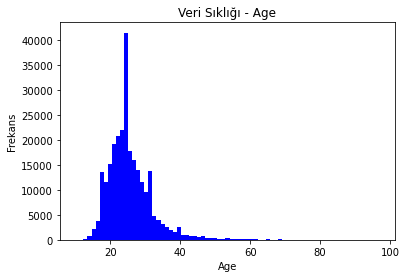

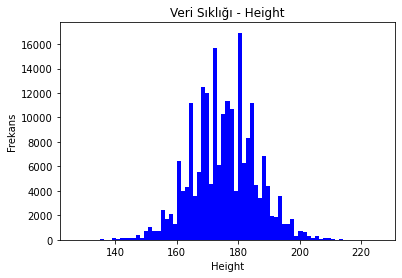

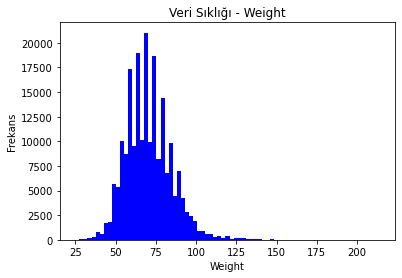

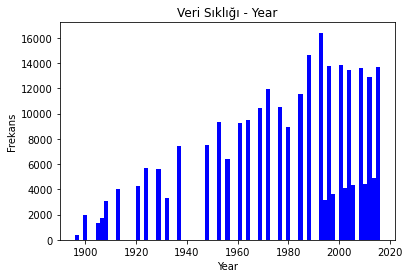

In [107]:
# tüm sayısal dğişkenler için histogramları çizdirelim
sayisal_degisken = ["Age", "Height", "Weight", "Year"]
for i in sayisal_degisken:
    plotHistogram(i)

Heatmap

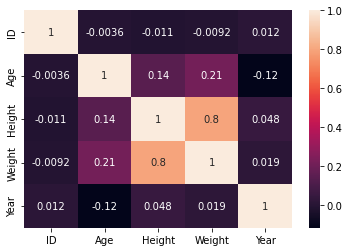

In [78]:
sns.heatmap(data.corr(method='pearson').drop(
  [], axis=1).drop([], axis=0),
            annot = True);
  
plt.show()

Scatter Plot 

Cinsiyete Göre Boy ve Ağırlık Karşılaştırması

In [16]:
erkek = data[data.Sex == "M"]
erkek.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [17]:
kadin = data[data.Sex == "F"]
kadin.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


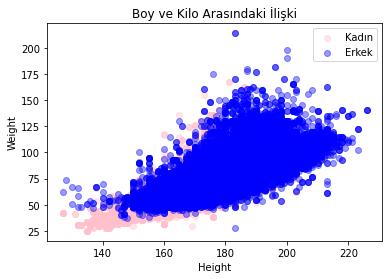

In [18]:
plt.figure()
plt.scatter(kadin.Height, kadin.Weight, alpha =0.4, label= "Kadın", color="pink")
plt.scatter(erkek.Height, erkek.Weight, alpha =0.4, label= "Erkek", color= "blue")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

Kutu Grafiği Çizdirme

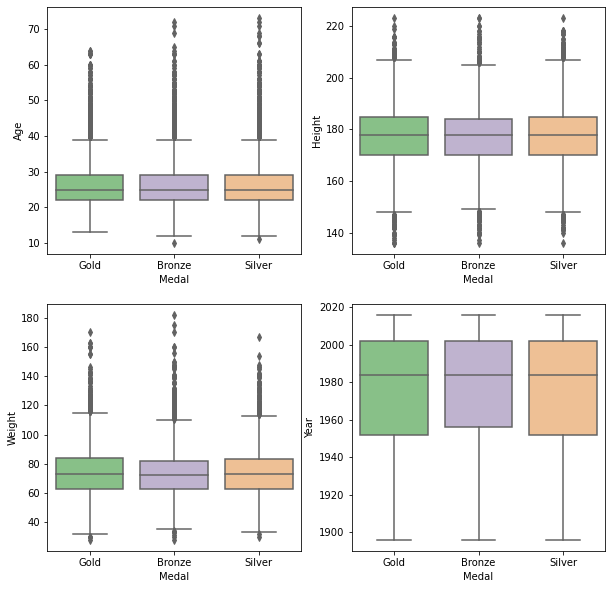

In [83]:
def graph(y):
    sns.boxplot(x="Medal", y=y, data=data,
               palette="Accent")
  
plt.figure(figsize=(10,10))

plt.subplot(221)
graph('Age')

plt.subplot(222)
graph('Height')
  
plt.subplot(223)
graph('Weight')
  
plt.subplot(224)
graph('Year')
  
plt.show()